<a href="https://colab.research.google.com/github/justabigneer/Bank-Queuing/blob/main/singleserverQueue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline


simulation_time = 200
arrival_prob = 0.3
service_time_range = (2, 6)

queue = []
server_busy = False
remaining_service_time = 0

waiting_times = []
queue_lengths = []
server_utilization_time = 0


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title("Bank Queue Simulation", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])

# Draw server area
server_rect = plt.Rectangle((7, 4), 2, 2, fill=False, linewidth=2, edgecolor='blue')
ax.add_patch(server_rect)
ax.text(8, 3.5, "Server", ha='center', fontsize=10)

queue_scatter = ax.scatter([], [], s=150, c='red', alpha=0.7)
server_dot = ax.scatter([8], [5], s=300, marker='s', c='green', alpha=0.5)

time_text = ax.text(0.1, 9.5, "", fontsize=12)
stats_text = ax.text(0.1, 8.8, "", fontsize=10)

# UPDATE FUNCTION
def update(frame):
    global server_busy, remaining_service_time, server_utilization_time

    # Customer arrival
    if random.random() < arrival_prob:
        queue.append(0)  # 0 = waiting time counter

    # Service process
    if server_busy:
        remaining_service_time -= 1
        server_utilization_time += 1
        if remaining_service_time <= 0:
            server_busy = False

    if not server_busy and queue:
        waiting_times.append(queue.pop(0))
        remaining_service_time = random.randint(*service_time_range)
        server_busy = True

    # Update waiting times
    for i in range(len(queue)):
        queue[i] += 1

    # Store stats
    queue_lengths.append(len(queue))

    # Update animation positions
    customer_positions = [(2 + i*0.6, 5) for i in range(len(queue))]
    if server_busy:
        customer_positions.append((8, 5))

    if customer_positions:
        queue_scatter.set_offsets(np.array(customer_positions))
    else:
        queue_scatter.set_offsets(np.empty((0, 2)))

    time_text.set_text(f"Time: {frame}")
    avg_wait = sum(waiting_times)/len(waiting_times) if waiting_times else 0
    stats_text.set_text(f"Queue Length: {len(queue)} | Avg Wait: {avg_wait:.1f} | Total Served: {len(waiting_times)}")

    return queue_scatter, time_text, stats_text

# Create animation with blit=False for better compatibility
ani = animation.FuncAnimation(fig, update, frames=simulation_time, interval=200, blit=False, repeat=False)

# Try this in Colab
plt.close()  # Close the initial static plot
HTML(ani.to_jshtml())

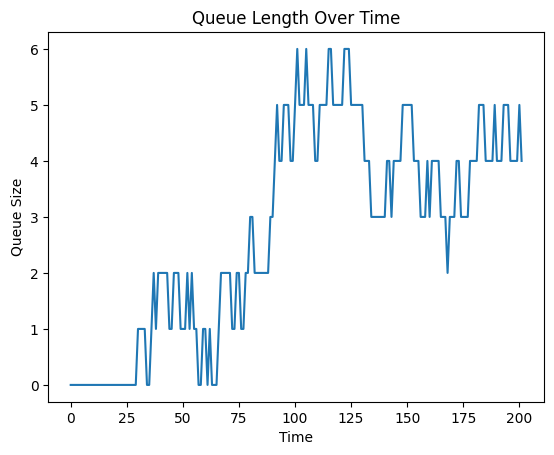

Average waiting time: 12.30952380952381
Server utilization: 0.87


In [ ]:
plt.figure()
plt.plot(queue_lengths)
plt.title("Queue Length Over Time")
plt.xlabel("Time")
plt.ylabel("Queue Size")
plt.show()
print("Average waiting time:", sum(waiting_times)/len(waiting_times))
print("Server utilization:", server_utilization_time/simulation_time)
